In [3]:
!pip install python-resize-image

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.listdir('/content/drive/My Drive/Woman')

['n04596852_5098.JPEG',
 'n04596852_1921.JPEG',
 'n04596852_4735.JPEG',
 'n04596852_2474.JPEG',
 'n04596852_7699.JPEG',
 'n04596852_408.JPEG',
 'n04596852_2927.JPEG',
 'n04596852_2248.JPEG',
 'n04596852_1022.JPEG',
 'n04596852_367.JPEG',
 'n04596852_7621.JPEG',
 'n04596852_2618.JPEG',
 'n04596852_2835.JPEG',
 'n04596852_1464.JPEG',
 'n04596852_5309.JPEG',
 'n04596852_3009.JPEG',
 'n04596852_3727.JPEG',
 'n04596852_2136.JPEG',
 'n04596852_2423.JPEG',
 'n04596852_2589.JPEG',
 'n04596852_8887.JPEG',
 'n04596852_52.JPEG',
 'n04596852_4261.JPEG',
 'n04596852_8956.JPEG',
 'n04596852_1599.JPEG',
 'n04596852_4426.JPEG',
 'n04596852_3398.JPEG',
 'n04596852_4133.JPEG',
 'n04596852_2458.JPEG',
 'n04596852_5688.JPEG',
 'n04596852_8393.JPEG',
 'n04596852_9078.JPEG',
 'n04596852_8110.JPEG',
 'n04596852_6362.JPEG',
 'n04596852_4922.JPEG',
 'n04596852_1018.JPEG',
 'n04596852_8669.JPEG',
 'n04596852_1673.JPEG',
 'n04596852_2264.JPEG',
 'n04596852_7820.JPEG',
 'n04596852_170.JPEG',
 'n04596852_4758.JPEG

In [6]:
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np

# create paths for all images
man_images = glob('/content/drive/My Drive/Man/*')

man_flattened = []
# for each image path
for path in man_images[:200]:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [20, 10])
            # flatten the matrix to an array and append it to all flattened images
            man_flattened.append((np.array(cover).flatten(), 0))
            

# Flatten it once more
man_flattened = np.asarray(man_flattened)

# Declare which are the X and Y inputs
X_man = man_flattened[:,0]
Y_man = man_flattened[:,1]

# Use np.stack to put the data into the right dimension
X_man = np.stack(i for i in X_man)
Y_man = np.stack(i for i in Y_man)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [7]:
# create paths for all images
woman_images = glob('/content/drive/My Drive/Woman/*')

woman_flattened = []
# for each image path
for path in woman_images[:200]:
    # open it as a read file in binary mode
    with open(path, 'r+b') as f:
        # open it as an image
        with Image.open(f) as image:
            # resize the image to be more manageable
            cover = resizeimage.resize_cover(image, [20, 10])
            # flatten the matrix to an array and append it to all flattened images
            woman_flattened.append((np.array(cover).flatten(), 1))
            

# Flatten it once more
woman_flattened = np.asarray(woman_flattened)

# Declare which are the X and Y inputs
X_woman = woman_flattened[:,0]
Y_woman = woman_flattened[:,1]

# Use np.stack to put the data into the right dimension
X_woman = np.stack(i for i in X_woman)
Y_woman = np.stack(i for i in Y_woman)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [8]:
len(X_man[1])

600

In [0]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load dataset into Pandas DataFrame
X_male = pd.DataFrame(X_man)
# standardize the values
X_male = StandardScaler().fit_transform(X_male)
# reload into dataframe
df_male = pd.DataFrame(X_male)

X_female = pd.DataFrame(X_woman)
X_female = StandardScaler().fit_transform(X_female)
df_female = pd.DataFrame(X_female)

In [10]:
from sklearn.decomposition import PCA

# run PCA
pca = PCA(n_components=2)
principalComponents_male = pca.fit_transform(df_male)
principalDf_male = pd.DataFrame(data = principalComponents_male, columns = ['PC1', 'PC2'])
# add target values
principalDf_male['Target'] = Y_man

# run PCA
pca = PCA(n_components=2)
principalComponents_female = pca.fit_transform(df_female)
principalDf_female = pd.DataFrame(data = principalComponents_female, columns = ['PC1', 'PC2'])
# add target values
principalDf_female['Target'] = Y_woman

# combine the two datasets
df_all = pd.concat([principalDf_male, principalDf_female], ignore_index = True)
df_all

,PC1,PC2,Target
0,-24.943928,10.164191,0
1,-5.106964,4.693439,0
2,27.348330,-12.446504,0
3,1.198095,8.381056,0
4,-3.460054,26.680488,0
...,...,...,...
395,-15.413701,9.389312,1
396,-14.396199,6.534165,1
397,-0.647525,15.046040,1
398,-25.995253,1.916582,1


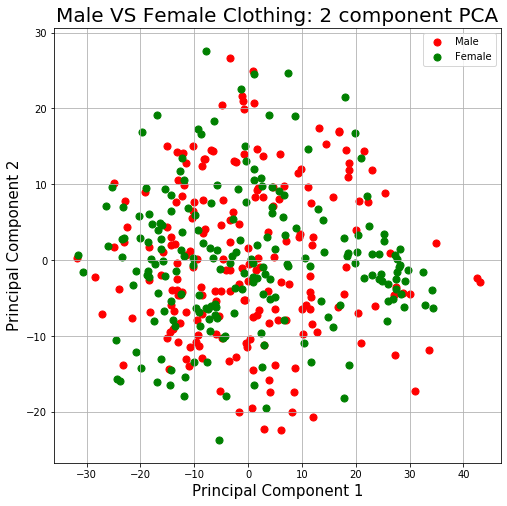

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Male VS Female Clothing: 2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_all['Target'] == target
    ax.scatter(df_all.loc[indicesToKeep, 'PC1']
               , df_all.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
target_names = ['Male', 'Female']
ax.legend(target_names)
ax.grid()

In [12]:
variance = pca.explained_variance_ratio_
print(f"PC1 contains {variance[0]*100}% of the variance.")
print(f"PC2 contains {variance[1]*100}% of the variance.")

PC1 contains 43.793383726132575% of the variance.
PC2 contains 13.718634083704606% of the variance.


# LDA

In [13]:
df_all.Target

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Target, Length: 400, dtype: int64

In [18]:
# load dataset into Pandas DataFrame
X_male_lda = pd.DataFrame(X_man)
X_male_lda['Target'] = Y_man

X_female_lda = pd.DataFrame(X_woman)
X_female_lda['Target'] = Y_woman

# combine the two datasets
df_all_lda = pd.concat([X_male_lda, X_female_lda], ignore_index = True)
df_all_lda

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,Target
0,255,255,255,205,207,208,6,10,14,5,7,9,9,10,13,16,20,24,8,12,15,8,12,15,8,12,15,9,13,16,9,13,16,7,11,14,8,11,15,7,...,6,10,11,4,8,10,5,7,9,5,7,10,4,8,11,6,10,13,9,13,16,2,6,9,28,32,35,209,210,210,19,20,21,0,2,5,178,181,182,0
1,160,104,48,144,87,32,213,172,137,254,207,177,177,132,106,42,34,32,56,45,43,53,43,41,55,44,43,48,36,35,50,41,40,88,78,79,117,106,110,114,...,51,45,44,67,64,67,119,116,127,107,104,112,93,90,95,110,107,115,109,107,115,124,122,132,136,134,144,151,151,163,158,153,162,215,177,147,238,200,163,0
2,192,193,193,188,187,186,181,185,188,193,211,225,198,216,230,200,218,232,202,220,234,206,224,238,206,225,239,207,225,240,192,207,210,203,219,229,208,227,241,203,...,200,218,232,194,212,226,199,217,231,202,220,234,195,213,227,192,210,224,195,213,227,176,194,207,136,129,125,191,134,100,190,127,90,119,90,70,114,117,118,0
3,134,128,175,148,153,188,196,196,211,196,174,201,167,136,179,225,216,226,223,224,216,64,64,79,24,15,47,39,32,70,41,33,71,26,21,47,34,24,47,34,...,136,120,146,69,58,66,24,18,37,29,22,48,24,19,44,35,23,47,19,16,41,44,30,60,25,18,43,66,57,86,123,120,162,119,123,158,98,108,159,0
4,255,255,255,255,255,255,254,254,254,255,255,255,114,113,112,38,38,38,38,36,36,16,14,15,43,41,42,39,36,35,41,38,38,42,41,41,61,56,54,69,...,23,19,21,30,27,28,23,19,20,28,23,23,30,26,26,28,25,24,41,39,39,39,37,36,18,14,13,96,94,92,254,254,254,254,254,254,255,255,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,113,107,67,112,116,84,94,100,71,5,9,0,17,21,4,7,50,49,131,86,45,144,152,123,61,68,54,1,1,2,104,95,92,177,142,132,129,127,117,18,...,254,29,13,247,27,13,250,39,28,250,47,35,249,51,40,249,57,46,253,45,37,227,29,27,248,28,17,252,164,100,254,255,255,254,250,250,254,253,253,1
396,163,128,89,193,168,131,169,140,105,148,87,41,135,74,34,100,14,12,158,15,11,180,58,41,180,48,34,192,28,21,169,16,12,164,82,63,194,132,85,212,...,143,19,15,126,17,13,137,14,12,136,6,5,184,26,19,192,27,19,194,21,12,176,20,15,159,17,13,195,25,16,197,29,20,193,25,17,187,21,12,1
397,206,211,210,200,206,205,199,203,202,201,206,205,215,223,222,111,115,113,77,82,83,42,47,46,59,62,61,48,50,49,26,29,30,51,53,53,40,45,46,56,...,89,95,97,94,102,102,56,60,59,34,34,36,65,70,70,73,80,81,60,65,66,51,53,54,53,55,54,173,175,173,193,193,193,186,186,186,184,184,184,1
398,71,67,57,156,153,142,68,78,72,74,85,93,38,49,44,65,71,66,91,97,102,34,30,16,58,60,57,90,93,88,63,64,55,108,103,94,82,85,91,136,...,48,53,55,63,61,45,46,44,28,54,51,36,45,46,35,58,58,44,45,43,36,82,58,34,95,69,38,120,84,36,95,70,29,52,46,26,48,43,24,1


In [38]:
class_feature_means = pd.DataFrame(columns=[0,1])
for c, rows in df_all_lda.groupby('Target'):
    class_feature_means[c] = rows.mean()
class_feature_means = class_feature_means.drop('Target')
class_feature_means

,0,1
0,153.325,154.625
1,146.280,144.535
2,136.995,130.505
3,149.020,150.755
4,139.605,139.870
...,...,...
595,129.750,141.045
596,122.060,132.255
597,149.240,158.560
598,140.395,147.275


In [0]:
within_class_scatter_matrix = np.zeros((600,600))
for c, rows in df_all_lda.groupby('Target'):
    rows = rows.drop(['Target'], axis=1)
    s = np.zeros((600,600))

for index, row in rows.iterrows():
    x, mc = row.values.reshape(600,1), class_feature_means[c].values.reshape(600,1) 
    s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s

In [0]:
feature_means = df_all_lda.mean()
feature_means = feature_means.drop('Target')
between_class_scatter_matrix = np.zeros((600,600))
for c in class_feature_means:    
    n = len(df_all_lda.loc[df_all_lda['Target'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(600,1), feature_means.values.reshape(600,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

In [0]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [48]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

76831063328.04776
0.4350417180517277
0.04572218659983949
0.03863154858680912
0.036217237620103426
0.036217237620103426
0.03474616703991004
0.03474616703991004
0.028880310551734463
0.028880310551734463
0.02874251042822929
0.028645899927896092
0.028645899927896092
0.028237426675175353
0.028237426675175353
0.026993438065727432
0.026993438065727432
0.02696915820085647
0.02696915820085647
0.026820919773793323
0.026820919773793323
0.0266143123781963
0.0266143123781963
0.026358559799886504
0.026358559799886504
0.026207697810822324
0.026207697810822324
0.025643857862229016
0.0251684762443231
0.0251684762443231
0.025152075927107755
0.025152075927107755
0.024983166742147955
0.024983166742147955
0.024830283143363947
0.024830283143363947
0.02459881623622245
0.02459881623622245
0.024017625205369725
0.023848218433455776
0.023848218433455776
0.02334524764749448
0.02334524764749448
0.02320137968382097
0.02320137968382097
0.023163903117658424
0.023163903117658424
0.022958257744450667
0.0229582577444506

In [49]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: -1.0000000000061737
Eigenvector 1: -5.662315464734669e-12
Eigenvector 2: -5.951002709008524e-13
Eigenvector 3: -5.028115831496618e-13
Eigenvector 4: -4.713879523662097e-13
Eigenvector 5: -4.713879523662097e-13
Eigenvector 6: -4.5224113184231054e-13
Eigenvector 7: -4.5224113184231054e-13
Eigenvector 8: -3.7589367244081585e-13
Eigenvector 9: -3.7589367244081585e-13
Eigenvector 10: -3.7410012543603663e-13
Eigenvector 11: -3.728426848104749e-13
Eigenvector 12: -3.728426848104749e-13
Eigenvector 13: -3.6752617303737613e-13
Eigenvector 14: -3.6752617303737613e-13
Eigenvector 15: -3.5133495355439035e-13
Eigenvector 16: -3.5133495355439035e-13
Eigenvector 17: -3.510189372997741e-13
Eigenvector 18: -3.510189372997741e-13
Eigenvector 19: -3.490895298356196e-13
Eigenvector 20: -3.490895298356196e-13
Eigenvector 21: -3.464004170386752e-13
Eigenvector 22: -3.464004170386752e-13
Eigenvector 23: -3.4307165172900636e-13
Eigenvector 24: -3.4307165172900636e-13
Eigenvec

In [0]:
w_matrix = np.hstack((pairs[0][1].reshape(600,1), pairs[1][1].reshape(600,1))).real

In [0]:
X_lda = df_all_lda.drop('Target', axis=1)
X_lda = np.array(X_lda.dot(w_matrix))

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_lda = le.fit_transform(df_all_lda['Target'])

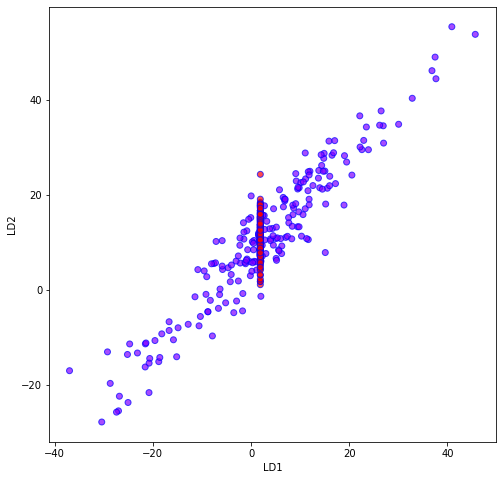

In [70]:
fig = plt.figure(figsize = (8,8))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y_lda,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
y = df_all_lda['Target']
X = df_all_lda.drop('Target', axis=1)
X_lda = lda.fit_transform(X, y)

In [72]:
lda.explained_variance_ratio_

array([1.])

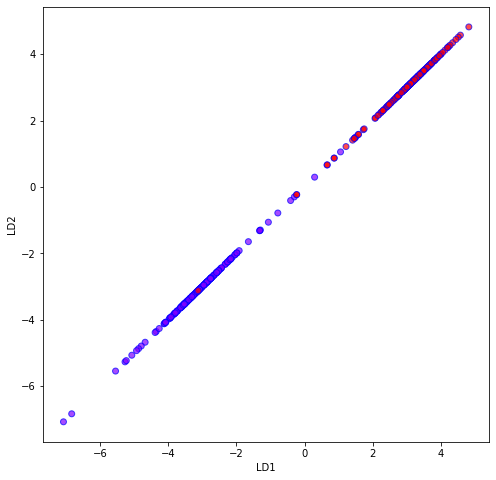

In [87]:
fig = plt.figure(figsize = (8,8))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,0],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

### Compare the LDA to PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [81]:
pca.explained_variance_ratio_

array([0.39463238, 0.1569985 ])

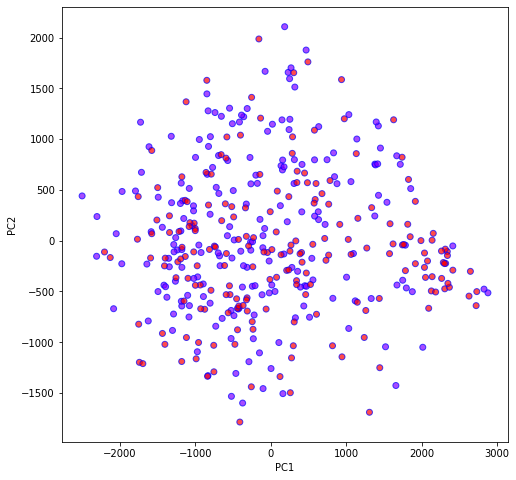

In [83]:
fig = plt.figure(figsize = (8,8))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [86]:
# creating a model to classify the using the LDA components as features

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[40,  2],
       [ 2, 56]])